# Python for Librarians - Week 4 Workalong

Answers in case you need them.

In [8]:
#This should look familar
import pandas as pd
import numpy

#We'll draw a graph later on
import matplotlib.pyplot as plt

#Our 'ML pieces'
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_text


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

This next two cells should look familar, we are loading up the CSV file from week two and putting it in a pandas dataframe. (The dataset is a bit modified and truncated just to make life a bit easier)

In [2]:
#We'll reuse the same data set from Week 2, the circulation stats from
# the SF Library system
sf_data = pd.read_csv("https://raw.githubusercontent.com/elibtronic/lja_datasets/master/week_4_workalong_san_francisco.csv")


In [ ]:
#Run this a few times to seem more glimpses of the data.
sf_data.sample(10)

In [3]:
features = ["Total Checkouts", "Total Renewals", "Circulation Active Year"]
#The usual notation is to put all of the features into a variable called X
X = sf_data[features]

target = sf_data["Patron Type Definition"]
#Similarly the target is often put in a variable called y
y = target


With these pieces done we'll now build our ML Decision Tree Classifier. This might look complex but each line has some comments that explain what it is doing. One thing to note specifically is that line 13 does the work of creating 4 subsets of our data with the `train_test_split` function. Basically rows of training features with corresponding targets, then rows of testing features with the corresponding targets. We split our rows of data into a proportion set by the value `test_size`. Here we start with **0.2**. In other otherwords, we'll use 20% of our data to test our model and the remaining 80% to do the training.

In [9]:
#what percentage of the dataset will we devote to testing our tree
#the remaining 80% of the data will be used for training
test_percent = 0.2


#train_test_split takes our data and creates for different sets with it

#A quick note here. Just like how we gave multiple values to
#the print statement as input, functions can return multiple values
#that is why we have this notation of four values seperated by commas
#on the left hand side of the = sign

X_train, X_test, y_train, y_test = train_test_split(X, \
                                                    y, \
                                                    test_size= test_percent)
# Create a Decision Tree classifer object
treeClass = DecisionTreeClassifier()

# We give our decision tree our training data. This is that it uses to build the tree
treeClass = treeClass.fit(X_train,y_train)

# We now test how accurate the tree is by giving it our testing data and seeing how
#the decision tree it created scores those values
y_pred = treeClass.predict(X_test)



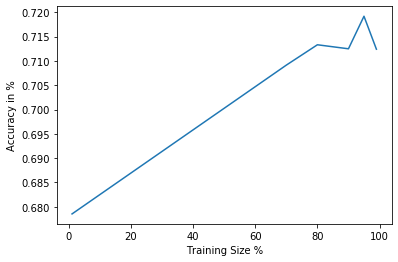

In [10]:
#A list of different values for testing sizes we'll loop through below
#values should be between 1 - 99, ie there must be at least 1% devoted to training
testing_percents = [1,5,10,20,30,99]

#used in our graph
accuracy = []
training_percents = []

for test_ratio in testing_percents:

    
    X_train, X_test, y_train, y_test = train_test_split(X, \
                                                        y, \
                                                        test_size=test_ratio/100.0)
    #Build/train/test our model
    treeClassTest = DecisionTreeClassifier()
    treeClassTest = treeClassTest.fit(X_train,y_train)
    y_pred = treeClassTest.predict(X_test)
    
    #Calculate our scores and add them to the list that will be used
    # by the graph
    score = metrics.accuracy_score(y_test,y_pred)
    accuracy.append(score)
    training_percents.append(100 - test_ratio)

    
plt.plot(training_percents,accuracy)
plt.ylabel("Accuracy in %")
plt.xlabel("Training Size %")
plt.show()

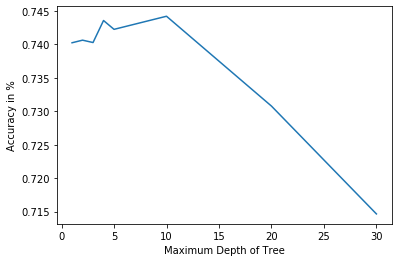

In [11]:
#We'll just keep our testing percent set to 20% so we can observe the changes
#setting a maximum depth has
test_percent = 20

max_options = [1,2,3,4,5,10,20,30]

accuracy = []
tree_max = []

for max_d in max_options:
    X_train, X_test, y_train, y_test = train_test_split(X, \
                                                        y, \
                                                        test_size=test_percent/100.0)
    
    
    #Build/train/test our model
    #We set maximum depth in the DecisionTreeClassifer when we first create the variable
    #with the paramater max_depth
    treeClassTest = DecisionTreeClassifier(max_depth=max_d)
    treeClassTest = treeClassTest.fit(X_train,y_train)
    y_pred = treeClassTest.predict(X_test)
    
    #Calculate our scores and add them to the list that will be used
    # by the graph
    score = metrics.accuracy_score(y_test,y_pred)
    accuracy.append(score)
    tree_max.append(max_d)

    
plt.plot(max_options,accuracy)
plt.ylabel("Accuracy in %")
plt.xlabel("Maximum Depth of Tree")
plt.show()

## Question 1

You've just adjusted training set size and maximum depth. Take a look at the y-axis for each graph (Accuracy in %). Which hyperparamater has a stronger affect on the accuracy?

The hyperparameter with the stongest effect is... 

- Training Set Size

I know this because...

- The difference in the Y-axis is about 4 for training set size
- The difference in the Y-axis is about 3 for Maximum Depth of Tree


(This might vary with your experiments. Be sure to run the code a few times to see if a patter emerges.

## Question 2

What combination of the 2 parameters created the highest accuracy?

This will vary person to person on account of the randomness of the searches involved.

## Question 3

What combination of the 2 paramester created the lowest accuracy?

This will vary person to person on account of the randomness of the searches involved just like question 2.

## Question 4

What combination of `test_percent` and `number_estimators` gets you the highest accuracy?

I got the highest accuracy with...

This will vary person to person on account of the randomness of the searches involved.

## Question 5

What combination of `test_percent` and `number_estimators` gets you the lowest accuracy?

I got the lowest accuracy with...

This will vary person to person on account of the randomness of the searches involved just as in question 4